# Haldane Model

Saumya Biswas (saumyab@uoregon.edu)

In [1]:
from qutip import *
import matplotlib.pyplot as plt
import numpy as np

In the unit cell:  
Number of orbitals:  2
On-site energies of the orbitals:   [0.0, 0.0]
Vectors representing the positions of the orbitals:   [[0.0, 0, 0], [0.6666666666666666, -0.3333333333333333]]
The hoppings within the unit cell:  [[0, 1, -1.0]]
The minimum dimension:  2
In the unit cell:  
Number of orbitals:  2
On-site energies of the orbitals:   [0.0, 0.0]
Vectors representing the positions of the orbitals:   [[0.0, 0, 0], [0.6666666666666666, -0.3333333333333333]]
The hoppings within the unit cell:  [[0, 1, -1.0]]
The minimum dimension:  2
The basis vector array:  [[0.8660254037844386, 0.5], [0.8660254037844386, -0.5]]
The inter hopping array:  [(0, 1, -1.0, (-1, 0)), (0, 1, -1.0, (-1, 1)), (0, 0, (9.184850993605149e-18+0.15j), (0, -1)), (1, 1, (9.184850993605149e-18-0.15j), (0, -1)), (0, 0, (9.184850993605149e-18+0.15j), (-1, 0)), (1, 1, (9.184850993605149e-18-0.15j), (-1, 0)), (0, 0, (9.184850993605149e-18+0.15j), (-1, 1)), (1, 1, (9.184850993605149e-18-0.15j), (-1, 1))]
Th

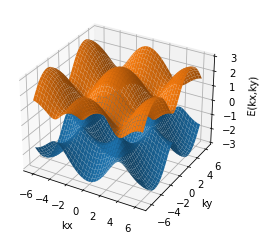

In [5]:
############################## Graphene Tight-binding##########################

eps0 = 0.0; eps1 = 0.0;
t = -1.0; 
tNNN =0.15*np.exp((1.j)*np.pi/2.)
tNNNc=tNNN.conjugate()
a1_vec = [np.sqrt(3)/2,1/2]; a2_vec = [np.sqrt(3)/2,-1/2]; 

pos0 = [0.0,0,0]; pos1 = [2/3,-1/3];

############ method 1: Adding Two orbitals at once ############################
dimensions=2
number_of_orbitals=2
onsite_energy_array = [eps0, eps1]
position_array = [pos0, pos1]

###  [...[orbital_m,orbital_n,hopping_mn],[orbital_p,orbital_q,hopping_pq]...]
intra_hopping_array=[[0,1,t]]

F1 = Qbasis(onsite_energy_array, position_array ,intra_hopping_array, dimensions, number_of_orbitals)

F1.display_model()
F1.basis_Hamiltonian()


basis_vector_array = [a1_vec, a2_vec]

inter_hopping_vec0 = (0,-1)
inter_hopping_vec1 = (-1,0)
inter_hopping_vec2 = (-1,1)

inter_hopping_array=[  (0,1,t,inter_hopping_vec1) ,  (0,1,t,inter_hopping_vec2) , \
                     (0,0,tNNN,inter_hopping_vec0), (1,1,tNNNc,inter_hopping_vec0), \
                     (0,0,tNNN,inter_hopping_vec1), (1,1,tNNNc,inter_hopping_vec1), \
                     (0,0,tNNN,inter_hopping_vec2), (1,1,tNNNc,inter_hopping_vec2) ]                   

periodic_dimensions = 2

F1crys = Qcrystal(F1, inter_hopping_array, basis_vector_array, periodic_dimensions )
F1crys.display_model()
#F1crys.dispersion()

# must choose kpoints to be an odd integer
k1_start = -2*np.pi; k1_end = 2*np.pi; k1points = 201;
kdim1 = [k1_start,k1_end,k1points]
k2_start = -2*np.pi; k2_end = 2*np.pi; k2points = 201;
kdim2 = [k2_start,k2_end,k2points]

to_display = 1;
(kxA,kyA,val_ks) = F1crys.dispersion(to_display, kdim1, kdim2 )


In [6]:
vecs_ks = F1crys.EigVector_At_K(0, kdim1, kdim2 )

In [7]:
np.shape(vecs_ks)

(201, 201, 2, 2)

In [8]:
max_occ = 1
occ_bnds = np.zeros((k1points,k2points,max_occ,2),dtype=complex)
for i in range(max_occ):
    occ_bnds[:,:,i,:] = vecs_ks[:,:,i,:]

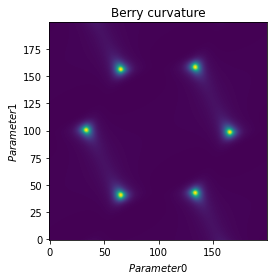

In [9]:
plot_berry_curvature(occ_bnds)

In [10]:
b_curv = berry_curvature(occ_bnds)
# The numerical integration amounts to summing up the discretized Berry curvature.
print('The Chern number is:')
print(b_curv.sum()/2/np.pi/np.pi )

The Chern number is:
1.001435318681096


In [11]:
qutip.about()


QuTiP: Quantum Toolbox in Python
Copyright (c) QuTiP team 2011 and later.
Current admin team: Alexander Pitchford, Nathan Shammah, Shahnawaz Ahmed, Neill Lambert, Eric Giguère, Boxi Li, Jake Lishman and Simon Cross.
Board members: Daniel Burgarth, Robert Johansson, Anton F. Kockum, Franco Nori and Will Zeng.
Original developers: R. J. Johansson & P. D. Nation.
Previous lead developers: Chris Granade & A. Grimsmo.
Currently developed through wide collaboration. See https://github.com/qutip for details.

QuTiP Version:      4.7.0.dev0+2941f20
Numpy Version:      1.19.1
Scipy Version:      1.5.2
Cython Version:     0.29.21
Matplotlib Version: 3.3.1
Python Version:     3.6.13
Number of CPUs:     4
BLAS Info:          INTEL MKL
OPENMP Installed:   True
INTEL MKL Ext:      True
Platform Info:      Linux (x86_64)
Installation path:  /home/ssaumya7/Desktop/qutip_serenity/qutip/qutip
Please cite QuTiP in your publication.
For your convenience a bibtex reference can be easily generated using `q

In [12]:
qutip.cite()

@article{qutip2,
doi = {10.1016/j.cpc.2012.11.019},
url = {https://doi.org/10.1016/j.cpc.2012.11.019},
year  = {2013},
month = {apr},
publisher = {Elsevier {BV}},
volume = {184},
number = {4},
pages = {1234--1240},
author = {J.R. Johansson and P.D. Nation and F. Nori},
title = {{QuTiP} 2: A {P}ython framework for the dynamics of open quantum systems},
journal = {Computer Physics Communications}
}
@article{qutip1,
doi = {10.1016/j.cpc.2012.02.021},
url = {https://doi.org/10.1016/j.cpc.2012.02.021},
year  = {2012},
month = {aug},
publisher = {Elsevier {BV}},
volume = {183},
number = {8},
pages = {1760--1772},
author = {J.R. Johansson and P.D. Nation and F. Nori},
title = {{QuTiP}: An open-source {P}ython framework for the dynamics of open quantum systems},
journal = {Computer Physics Communications}
}
